In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# set grid size, M*N (row, col)
M: int = 10
N: int = 10

(3, 1)
1
[(4, 4)]


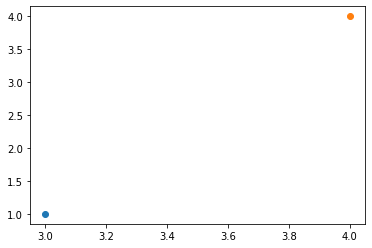

In [34]:
# set initial coordinate values
w_x0 = random.sample([i for i in range(0,M)], 1)
w_y0 = random.sample([j for j in range(0,N)], 1)

b_x0 = random.sample([i for i in range(0,M)], 1)
b_y0 = random.sample([j for j in range(0,N)], 1)


white = [(x,y) for x, y in zip(w_x0, w_y0)]
black = [(x,y) for x, y in zip(b_x0, b_y0)]
print(white[0])
print(white[0][1])
print(black)

plt.scatter(*zip(*white))
plt.scatter(*zip(*black))
plt.show()

In [35]:
def moves(pos: tuple, dpos: tuple) -> tuple:
    return (pos[0] + dpos[0], pos[1] + dpos[1])


def check_neighbors(white_pos: tuple, black_pos: tuple) -> bool:
    stationary = white_pos
    up = (white_pos[0], white_pos[1] + 1)
    upper_right = (white_pos[0] + 1, white_pos[1] + 1)
    upper_left = (white_pos[0] - 1, white_pos[1] + 1)
    left = (white_pos[0] - 1, white_pos[1])
    right = (white_pos[0] + 1, white_pos[1])
    lower_left = (white_pos[0] - 1, white_pos[1] - 1)
    down = (white_pos[0], white_pos[1] - 1)
    lower_right = (white_pos[0] + 1, white_pos[1] - 1)

    if (black_pos == stationary) or (black_pos == up) or (black_pos == upper_right) or (black_pos == upper_left) or (black_pos == left) or (black_pos == right) or (black_pos == lower_left) or (black_pos == down) or (black_pos == lower_right):
        return True
    else:
        return False

    

In [36]:


dt_w = random.sample([i for i in range(-1,2)], 2)
dt_bl = random.sample([i for i in range(-1,2)], 2)

print(dt_w)
print(dt_bl)

print(moves(white[0], dt_w))
print(moves(white[0], dt_bl))

[-1, 1]
[-1, 0]
(2, 2)
(2, 1)


In [37]:
def run_sim():
    w_x0 = random.sample([i for i in range(0,M)], 1)
    w_y0 = random.sample([j for j in range(0,N)], 1)

    b_x0 = random.sample([i for i in range(0,M)], 1)
    b_y0 = random.sample([j for j in range(0,N)], 1)


    white = [(x,y) for x, y in zip(w_x0, w_y0)]
    black = [(x,y) for x, y in zip(b_x0, b_y0)]
    stop: bool = False
    n: int = 0
    t: int = 0
    while n < 100000:
        if check_neighbors(white[n], black[n]) == True:
            break
        else:
            dt_w = random.sample([i for i in range(-1,2)], 2)
            dt_bl = random.sample([i for i in range(-1,2)], 2)
            white.append(moves(white[n], dt_w))
            black.append(moves(black[n], dt_bl))
            t = t+1
            n = n+1
    return t
  

#white, black, t, n = run_sim()
#print(white)
#print(black)
#print(t)
#print(n)


In [41]:

t_dist = [run_sim() for i in range(100)]
print(t_dist)

[0, 14, 0, 1, 0, 1, 36, 14896, 5997, 5, 1, 9, 100000, 1, 100000, 84, 0, 0, 100000, 1, 128, 3, 21, 17, 0, 100000, 2798, 12, 0, 2, 67, 9756, 100000, 0, 1301, 0, 100000, 1, 2499, 0, 17763, 4, 4, 4, 0, 6, 0, 100000, 0, 0, 2765, 2, 0, 17, 4, 98, 0, 366, 0, 3, 100000, 100000, 100000, 100000, 7, 1, 0, 1, 61295, 0, 1, 70367, 0, 5, 0, 956, 100000, 1331, 100000, 0, 11, 94, 7, 0, 100000, 0, 0, 0, 4, 0, 100000, 0, 1, 110, 6, 100000, 98906, 7, 38, 2]


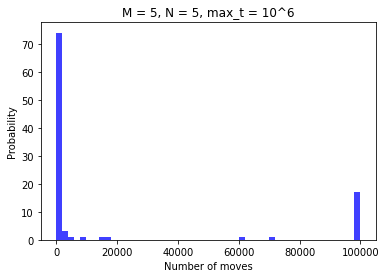

In [44]:
n, bins, patches = plt.hist(t_dist, 50, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Number of moves')
plt.ylabel('Probability')
plt.title(f'M = {M}, N = {N}, max_t = 10^6')
plt.show()
